# Практика 05-06. Библиотека Pandas. Сводные таблицы. Категоризация данных. Функция для одной строки

**Постановка бизнес-задачи**<br><br>
*Заказчик исследования* — Министерство культуры Российской Федерации.<br>
Необходимо изучить **рынок российского кинопроката** и выявить текущие тренды.<br>
Особое внимание стоит уделить фильмам, которые получили **государственную поддержку**. Насколько такие фильмы интересны зрителю?<br>
Данные были выгружены с портала открытых данных Министерства культуры.<br>
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.<br><br>
**Задачи исследования**<br>
- изучить рынок российского кинопроката и выявить текущие тренды;<br>
- установить, вызывают ли интерес у зрителей фильмы, получившие государственную поддержку;<br>
- оценить текущее состояние рынка кино в России и возможные перспективы.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [4]:
data = pd.read_csv('data_03_04.csv')

In [5]:
data.head()

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
0,221048915,открытый простор,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,0,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей
1,111013716,особо важное задание,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,нет данных,0,0,0,0,нет данных,6.6,"драма,военный",«6+» - для детей старше 6 лет
2,221038416,особо опасен,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
3,221026916,особо опасен,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
4,221030815,особо опасен,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pu_number              7478 non-null   int64  
 1   title                  7478 non-null   object 
 2   show_start_date        7478 non-null   object 
 3   type                   7478 non-null   object 
 4   film_studio            7478 non-null   object 
 5   production_country     7478 non-null   object 
 6   director               7478 non-null   object 
 7   producer               7478 non-null   object 
 8   budget                 7478 non-null   int64  
 9   box_office             7478 non-null   int64  
 10  refundable_support     7478 non-null   int64  
 11  nonrefundable_support  7478 non-null   int64  
 12  financing_source       7478 non-null   object 
 13  ratings                7478 non-null   float64
 14  genres                 7478 non-null   object 
 15  age_

In [7]:
data['show_start_date'] = data['show_start_date'].astype('datetime64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pu_number              7478 non-null   int64         
 1   title                  7478 non-null   object        
 2   show_start_date        7478 non-null   datetime64[ns]
 3   type                   7478 non-null   object        
 4   film_studio            7478 non-null   object        
 5   production_country     7478 non-null   object        
 6   director               7478 non-null   object        
 7   producer               7478 non-null   object        
 8   budget                 7478 non-null   int64         
 9   box_office             7478 non-null   int64         
 10  refundable_support     7478 non-null   int64         
 11  nonrefundable_support  7478 non-null   int64         
 12  financing_source       7478 non-null   object        
 13  rat

In [9]:
data.head()

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
0,221048915,открытый простор,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,0,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей
1,111013716,особо важное задание,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,нет данных,0,0,0,0,нет данных,6.6,"драма,военный",«6+» - для детей старше 6 лет
2,221038416,особо опасен,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
3,221026916,особо опасен,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
4,221030815,особо опасен,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей


# Практика 05-06. Поиск дубликатов в данных

Поиск дубликатов в данных. Ручной поиск дубликатов (в т.ч. с учетом регистра)

### 01. Поиск явных дубликатов

**Задание 01.** Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**a)** Поиск **явных дубликатов**.

In [10]:
print('Количество явных дубликатов в таблице:', data.duplicated().sum())

Количество явных дубликатов в таблице: 0


**b)** Проверка наличия **пустых**/почти пустых **строк**.

In [11]:
print('Максимальное количество пустых значений в записи:', data.isnull().sum(axis=1).max())

Максимальное количество пустых значений в записи: 0


Максимальное количество ячеек без введенных значений в одной строке - 7, то есть имеются записи, где половина значений не заполнена. Такое количество пропусков может объясняться тем, что сведения в четырех столбцах приведены только для тех фильмов, которые получили государственную поддержку.

**c)** Проверка наличия **дубликатов** в столбце с номерами прокатных удостоверений.

Предположительно, номера прокатных удостоверений не должны повторяться. На каждый фильм выдается свое прокатное удостоверение.

In [12]:
data[data['pu_number'].duplicated(keep=False)]

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
4632,221154310,как жениться и остаться холостым,2010-12-17 12:00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",0,0,0,0,нет данных,7.0,"мелодрама,комедия",«16+» - для детей старше 16 лет
4633,221154310,иоанна - женщина на папском престоле /по роман...,2010-12-17 12:00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",0,0,0,0,нет данных,7.6,"драма,мелодрама,история",«16+» - для детей старше 16 лет
5059,221054410,анализируй это!,2010-05-25 12:00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",0,0,0,0,нет данных,7.4,"комедия,криминал",«16+» - для детей старше 16 лет
5060,221054410,анализируй то!,2010-05-25 12:00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",0,0,0,0,нет данных,6.8,"комедия,криминал",«12+» - для детей старше 12 лет


Номер прокатного удостоверения 221154310 закреплен за двумя разными фильмами. На сайте Минкульта России аналогичные данные (https://opendata.mkrf.ru/opendata/7705851331-register_movies).<br>
Возможные варианты: ошибка при выдаче удостоверения; два фильмы могли выйти в прокат совместно (двойной сеанс).<br>
Номер прокатного удостоверения 221054410 закреплен за дилогией фильмов. При этом наблюдается отсутствие лексического соответствия при переводе имен собственных. *На данный факт стоит обратить внимание ответственных за выдачу прокатных удостоверений*.

**d)** Проверка наличия **дубликатов** в столбце с названиями фильмов.

In [13]:
data[data['title'].duplicated(keep=False)]

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
2,221038416,особо опасен,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
3,221026916,особо опасен,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
4,221030815,особо опасен,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",0,0,0,0,нет данных,6.8,"фантастика,боевик,триллер",«18+» - запрещено для детей
12,221011415,малышка на миллион /по мотивам рассказов ф.х.т...,2015-04-03 12:00:00,художественный,"уорнер бразерс, лейкшор интертейнмент, малпасо...",сша,клинт иствуд,"клинт иствуд, том розенберг, альберт с.рудди, ...",0,0,0,0,нет данных,8.1,"драма,спорт",«16+» - для детей старше 16 лет
26,221012515,оружейный барон,2015-04-03 12:00:00,художественный,"вэ и пэ медиенфондс 3, асендант пикчерз, сатур...",сша - франция - турция,эндрю никкол,"норман голуайтли, энди грош, николас кейдж, эн...",0,0,0,0,нет данных,7.7,"боевик,драма,криминал",«18+» - запрещено для детей
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361,111019319,невиновен,2019-11-07 12:00:00,художественный,"ооо ""кавказфильм""",россия,а.емкужев,"а.емкужев, а.хуажева, ооо ""корпорация русская ...",0,0,0,0,нет данных,7.5,"триллер,детектив,криминал",«16+» - для детей старше 16 лет
7408,121035119,"отель ""гранд будапешт""",2019-12-13 12:00:00,художественный,"американ эмпирикал, индиан пэинтбраш, скотт ру...","германия, сша",уэс андерсен,"уэс андерсон, джереми доусон, стивен рейлс",0,0,0,0,нет данных,7.9,"комедия,приключения,детектив",«16+» - для детей старше 16 лет
7430,121035919,зверь,2019-12-05 12:00:00,художественный,студио энд нью,южная корея,ли джон-хо,"чан гён-ик, чон джи-хун, пэк кён сук",0,175003,0,0,нет данных,6.5,"триллер,драма",«18+» - запрещено для детей
7442,121036919,в тихом омуте,2019-12-09 12:00:00,художественный,"хэд гир филмз, крео филмз, локал хироу, метрол...",сша,адам рэндолл,мэтт уолдек,0,0,0,0,нет данных,6.8,"триллер,криминал,детектив",«18+» - запрещено для детей


Выявлено 1288 записей, где названия фильмов повторяются. Одни и те же фильмы могли выходить в прокат несколько раз и на разных носителях. *Полностью идентичных записей не обнаружено*.<br>
Стоит учитывать, что есть множество разных фильмов с одинаковыми названиями, например, фильм Схватка с Пачино и Схватка с Лиамом Нисоном. Хищник 18 года и Хищник 87 года. В оригинале один из них просто с артиклем, но у нас в языке нет артиклей.  Мстители 98 года и современные Мстители, ну и т.д.

### 02. Поиск неявных дубликатов

Неявные дубликаты возможны в столбцах **'title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'financing_source', 'genres', 'age_restriction'**. Проверим данные столбцы.

**f)** Столбец **'title'**.<br>
Ранее было отмечено, что в конце строки присутствуют лишние символы точки и нижнего подчеркивания.<br>
Выполним удаление символов пробела, точки и нижнего подчеркивания в начале и в конце строки.

In [14]:
data['title'] = data['title'].str.lstrip(' ._')

In [15]:
data['title'] = data['title'].str.rstrip(' ._')

In [16]:
data.sample(10)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
6855,121008119,нуреев. белый ворон,2019-04-20 12:00:00,художественный,"би би си, магнолия маэ филмз, металворк пикчер...","сша, великобритания, франция",рэйф файнс,"кэролин маркс блэквуд, франсуа мвернел, эндрю ...",0,21390102,0,0,нет данных,6.8,"драма,биография",«16+» - для детей старше 16 лет
3391,121018416,сила воли,2016-06-21 12:00:00,художественный,"форкаст пикчерз, джобро продакшнз энд филм фин...",германия - канада,стивен хопкинс,"карстен брюниг, кейт гарвуд, люк дайан",0,2165614,0,0,нет данных,7.1,"история,спорт,драма",«16+» - для детей старше 16 лет
4877,221001611,полиция майами: отдел нравов,2011-01-11 12:00:00,художественный,"юниверсал пикчерз, форвард пасс, майкл манн пр...",сша,майкл манн,"питер йен браге, майкл манн",0,0,0,0,нет данных,7.5,"боевик,триллер,драма",«18+» - запрещено для детей
3133,111021115,чемпионы: быстрее. выше. сильнее,2015-12-22 12:00:00,художественный,"ооо ""энджой мувиз""",россия,а.аксененко,"г.малков, в.поляков",90276774,168688859,0,40000000,фонд кино,7.0,"спорт,драма",«6+» - для детей старше 6 лет
2863,221028116,да здравствует цезарь!,2016-06-21 12:00:00,художественный,"майк зосс продакшнз, уоркинг тайтл филмз",сша - великобритания,"джоэл коэн, итан коэн","тим беван, джоэл коэн, итан коэн",0,0,0,0,нет данных,6.6,"драма,комедия,детектив",«18+» - запрещено для детей
3589,121012417,мистер штайн идет в онлайн,2017-07-03 12:00:00,художественный,"иси э ля продюксьон, детейлфилм, ля компани си...",франция - германия - бельгия,стефани робели,"филипп борбели, кристоф браншер, фабиан гасмиа",0,4856233,0,0,нет данных,6.7,комедия,«16+» - для детей старше 16 лет
3531,111014216,по законам военного времени,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,и.слабневич,нет данных,0,0,0,0,нет данных,7.6,"военный,драма,история",«12+» - для детей старше 12 лет
6255,121021318,букшоп,2018-09-27 12:00:00,художественный,"кантракориент филмз, диагональ ти ви, грин филмз",великобритания - испания - германия,изабель койшет,"хауме банаколоча, хоан бас, хорди беренгер, ад...",0,1393898,0,0,нет данных,6.7,драма,«12+» - для детей старше 12 лет
1659,121022713,детородные,2013-08-29 12:00:00,художественный,"альянс филмз, аутоматик интертейнмент, дак атт...",сша,джей чандрашекхар,"джейсон блум, джей чандрашекхар",0,0,0,0,нет данных,5.5,комедия,«16+» - для детей старше 16 лет
2222,121022014,дурацкое дело нехитрое,2014-09-29 12:00:00,художественный,"парадокс филм 2, филм и васт",норвегия - дания - швеция,ганс петтер моланд,"финн гьёрдрум, стейн б.квае",0,0,0,0,нет данных,6.9,"криминал,комедия,драма",«18+» - запрещено для детей


**g)** Столбец **'type'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [17]:
data['type'].sort_values().unique()

array([' анимационный', ' художественный', 'анимационный',
       'документальный', 'музыкально-развлекательный',
       'научно-популярный', 'прочие', 'художественный'], dtype=object)

In [18]:
data['type'] = data['type'].str.strip()

In [19]:
data['type'].sort_values().unique()

array(['анимационный', 'документальный', 'музыкально-развлекательный',
       'научно-популярный', 'прочие', 'художественный'], dtype=object)

ИЛИ

In [20]:
#duplicates = [' анимационный', ' анимационный ', 'анимационный ']
#name='анимационный'

In [21]:
#data['type'] = data['type'].replace(duplicates, name)

**h)** Столбец **'film_studio'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [22]:
data['film_studio'].sort_values().unique()

array([' ано "кинофорум"',
       ' ауматик интертейнмент, блюмхаус продакшнз и др.',
       ' зао "кинокомпания фаворитфильм" по заказу ооо "фаворит медиа"',
       ..., 'яш радж фильмс', 'яш раи фильм', 'яш рай фильм'],
      dtype=object)

In [23]:
data['film_studio'] = data['film_studio'].str.strip()

In [24]:
data['film_studio'].sort_values().unique()

array(['"дино де лаурентиис" (италия) при участии киностудии "мосфильм"',
       '"союздетфильм", "мосфильм", "москинокомбинат"',
       '"студия "птица феникс" татьяны новиковой', ..., 'яш радж фильмс',
       'яш раи фильм', 'яш рай фильм'], dtype=object)

In [25]:
data['film_studio'] = data['film_studio'].str.replace('"', '', regex=True)

In [26]:
data['film_studio'].sort_values().unique()

array(['02 филмз, ромбэс медиа',
       '100 барес, 369 продюксьонес, антен 3 фильм, катманду брендид интертейнмент, плюраль - джемпса, прана анимейшн студиос, телевизион федераль',
       '100 барес, институто националь де сине и артс аудивизуалес, институто де ла синематографиа и де ла артс аудивизуалес, министеро де култура, телевизион федераль, торнасол фильм',
       ..., 'яш радж фильмс', 'яш раи фильм', 'яш рай фильм'],
      dtype=object)

Как было отмечено ранее, наблюдается отсутствие лексического соответствия при переводе названий студий.<br>
*При необходимости столбец можно лемматизировать и проверить/внести изменения в отдельные леммы*.

**i)** Столбец **'production_country'**.<br>
Выведем список уникальных значений.

In [27]:
data['production_country'].sort_values().unique()

array([' ссср', ' ссср ', ' ссср   ', '2019', 'cша', 'австралия',
       'австралия - великобритания - бельгия - индия',
       'австралия - германия', 'австралия - ирландия',
       'австралия - колумбия', 'австралия - сша', 'австралия, канада',
       'австралия, сша', 'австралия-великобритания', 'австралия-ирландия',
       'австралия-сша', 'австралия-турция-сша', 'австрия',
       'австрия - германия', 'австрия - германия - франция',
       'австрия - люксембург', 'австрия, великобритания, германия',
       'австрия-германия-франция', 'австрия-франция-германия',
       'азербайджан-россия', 'аргентина', 'аргентина - бразилия',
       'аргентина - испания', 'аргентина - испания - уругвай',
       'аргентина - мексика - бразилия - франция - сша',
       'аргентина - уругвай - россия - германия - франция - нидерланды',
       'аргентина - франция - испания', 'аргентина, испания',
       'аргентина-испания', 'армения', 'армения - германия',
       'армения - казахстан', 'армения-россия

В данном столбце наблюдаются множественные проблемы: лишние символы пробела в начале, в конце строки, отсутствие единообразия при вводе значений с несколькими странами, странами, чьи названия состоят из нескольких слов (*например*, юж. корея и южная корея), ошибки в написании стран (*например*, изриль и израиль).<br>
Столбец можно лемматизировать, проверить/внести изменения в отдельные леммы.<br>
*С целью экономии времени удалим лишние пробелы, в качестве разделителя используем символ запятой*.

In [28]:
data['production_country'] = data['production_country'].str.replace(' - ', ',', regex=True)

In [29]:
data['production_country'] = data['production_country'].str.replace('-', ',', regex=True)

In [30]:
data['production_country'] = data['production_country'].str.strip()

In [31]:
data['production_country'].sort_values().unique()

array(['2019', 'cша', 'австралия', 'австралия, канада', 'австралия, сша',
       'австралия,великобритания',
       'австралия,великобритания,бельгия,индия', 'австралия,германия',
       'австралия,ирландия', 'австралия,колумбия', 'австралия,сша',
       'австралия,турция,сша', 'австрия',
       'австрия, великобритания, германия', 'австрия,германия',
       'австрия,германия,франция', 'австрия,люксембург',
       'австрия,франция,германия', 'азербайджан,россия', 'аргентина',
       'аргентина, испания', 'аргентина,бразилия', 'аргентина,испания',
       'аргентина,испания,уругвай',
       'аргентина,мексика,бразилия,франция,сша',
       'аргентина,уругвай,россия,германия,франция,нидерланды',
       'аргентина,франция,испания', 'армения', 'армения,германия',
       'армения,казахстан', 'армения,россия', 'бельгия',
       'бельгия, великобритания, сша', 'бельгия, канада',
       'бельгия,германия,канада,франция,сша,великобритания',
       'бельгия,германия,люксембург',
       'бельгия,ге

Также в столбце **'production_country'** в списке уникальных значений появилось значение 2019. Проверим, что это за фильм.

In [32]:
data[data['production_country'] == '2019']

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
7239,121027219,дело коллини,2019-09-19 12:00:00,художественный,"константин филм, глобал скрин, севен пикчерз сван",2019,марко кройцпайнтнер,"мартин московиц, кристоф мюллер, марсель хартг...",0,0,0,0,нет данных,7.4,"детектив,драма,криминал",«16+» - для детей старше 16 лет


Согласно порталу КиноПоиск данный фильм вышел в 2019 году, страна-производитель - Германия. Внесем изменения в данные.

In [33]:
data['production_country'] = np.where((data.production_country == '2019'), 'германия', data.production_country)

In [34]:
data[data['pu_number'] == 121027219]

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction
7239,121027219,дело коллини,2019-09-19 12:00:00,художественный,"константин филм, глобал скрин, севен пикчерз сван",германия,марко кройцпайнтнер,"мартин московиц, кристоф мюллер, марсель хартг...",0,0,0,0,нет данных,7.4,"детектив,драма,криминал",«16+» - для детей старше 16 лет


Создадим столбец с основной страной. В столбец войдут первые значения из списка стран.

In [35]:
data['main_country'] = data['production_country'].str.split(",").str[0]

In [36]:
data.sample(5)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country
4906,221097111,бунт ушастых,2011-09-15 12:00:00,художественный,"юниверсал пикчерз, релативити медиа, иллюминей...",сша,тим хилл,"джоэн коэн, кристофер меледандри",0,0,0,0,нет данных,6.1,"мультфильм,фэнтези,комедия",«0+» - для любой зрительской аудитории,сша
154,221037813,дом из песка и тумана (по книге андре дюбуи iii),2013-10-25 12:00:00,художественный,кобальт пикчерз,сша,вадим перельман,майкл лондон,0,0,0,0,нет данных,0.0,нет данных,«16+» - для детей старше 16 лет,сша
4103,221123710,13,2010-10-25 12:00:00,художественный,"барбариан филмз, магнет медиа групп, морабито ...",сша,гела баблуани,нет данных,0,0,0,0,нет данных,6.8,"триллер,драма,криминал",«16+» - для детей старше 16 лет,сша
1852,114000115,тайна сухаревой башни. чародей равновесия,2015-02-18 12:00:00,анимационный,ооо студия мастер-фильм,россия,с.серегин,а.герасимов,51850000,15078858,0,25000000,министерство культуры,6.1,"мультфильм,фэнтези,история",«6+» - для детей старше 6 лет,россия
5800,111002818,два билета домой,2018-06-01 12:00:00,художественный,ано кинодело продакшн,россия,д.месхиев,"а.златопольский, д.месхиев, с.гармаш",110000000,1699377,0,60000000,министерство культуры,6.5,драма,«18+» - запрещено для детей,россия


**j)** Столбец **'director'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [37]:
data['director'].sort_values().unique().tolist()

[' йохан нийенхейс',
 ' н.орлов, р.быков',
 ' р.асхаев',
 ' т.саакян',
 ' ф.бондарчук',
 'а андрющенко',
 'а. калюжный',
 'а. кутерье',
 'а.а.эшпай',
 'а.аббасов',
 'а.абидова (псевдоним аниса сабири)',
 'а.аболс',
 'а.агаджанян',
 'а.адилханян',
 'а.адраникян',
 'а.аксененко',
 'а.аксененко, э.никогосян, д.дюжев, а.вакулов (а.кульбицкий)',
 'а.алов, в.наумов',
 'а.аманшаев, г.шенгелия',
 'а.амбросьев',
 'а.амиров',
 'а.ананикян, в.рейнгеверц',
 'а.андрианов',
 'а.андризани, а.бардани, в.карнелутти, ф.коста,  г.с.нардис, в.пальмьери, в.чеа, а.юлиано ',
 'а.анненский',
 'а.аравин',
 'а.аравин, а.прошкин',
 'а.арпеньтеньер, а.бариларо, м.бланчес, р.валлей, л.гранд, ф.дион, а.жасина, э.коэтс,  лу хаму-лхад, п.осборн, т.ушев',
 'а.артамонова',
 'а.арутюнов',
 'а.арутюнян, а.коршунов',
 'а.атанесян',
 'а.бадягина',
 'а.бажанов',
 'а.балабанов',
 'а.балахонов',
 'а.бальчев',
 'а.баранов',
 'а.баршак',
 'а.барщевский, и.матвеев',
 'а.барыкин',
 'а.басаев',
 'а.басов',
 'а.безрук',
 'а.беляев'

In [38]:
data['director'] = data['director'].str.strip()

In [39]:
data['director'] = data['director'].str.replace('  ', ' ', regex=True)

In [40]:
data['director'].sort_values().unique().tolist()

['а андрющенко',
 'а. калюжный',
 'а. кутерье',
 'а.а.эшпай',
 'а.аббасов',
 'а.абидова (псевдоним аниса сабири)',
 'а.аболс',
 'а.агаджанян',
 'а.адилханян',
 'а.адраникян',
 'а.аксененко',
 'а.аксененко, э.никогосян, д.дюжев, а.вакулов (а.кульбицкий)',
 'а.алов, в.наумов',
 'а.аманшаев, г.шенгелия',
 'а.амбросьев',
 'а.амиров',
 'а.ананикян, в.рейнгеверц',
 'а.андрианов',
 'а.андризани, а.бардани, в.карнелутти, ф.коста, г.с.нардис, в.пальмьери, в.чеа, а.юлиано',
 'а.анненский',
 'а.аравин',
 'а.аравин, а.прошкин',
 'а.арпеньтеньер, а.бариларо, м.бланчес, р.валлей, л.гранд, ф.дион, а.жасина, э.коэтс, лу хаму-лхад, п.осборн, т.ушев',
 'а.артамонова',
 'а.арутюнов',
 'а.арутюнян, а.коршунов',
 'а.атанесян',
 'а.бадягина',
 'а.бажанов',
 'а.балабанов',
 'а.балахонов',
 'а.бальчев',
 'а.баранов',
 'а.баршак',
 'а.барщевский, и.матвеев',
 'а.барыкин',
 'а.басаев',
 'а.басов',
 'а.безрук',
 'а.беляев',
 'а.берденников',
 'а.бзаров',
 'а.бильжо',
 'а.бобров',
 'а.бобровский',
 'а.богатырев',

В столбце имеются и другие проблемы: отсутствие символа точки после инициала, лишние пробелы между инициалом и фамилией. Для достижения целей исследования столбец не является важным. *С целью экономии времени остановимся на данном этапе обработки дубликатов*.

Создадим столбец с основным режиссером. В столбец войдут первые значения (имя, фамилия) из списка режиссеров.

In [41]:
data['main_director'] = data['director'].str.split(",").str[0]

In [42]:
data.sample(5)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director
5372,111009411,шпион,2011-12-09 12:00:00,художественный,ооо студия тритэ никиты михалкова,россия,а.андрианов,"с.шумаков, л.верещагин",0,5405,0,0,нет данных,7.1,"боевик,комедия,криминал",«16+» - для детей старше 16 лет,россия,а.андрианов
5293,111010011,моя безумная семья,2011-12-21 12:00:00,художественный,"ооо фокс интернэшнл продакшнс снг, нп интерфест",россия,р.давлетьяров,"р.давлетьяров, а.котелевский",0,4578,0,0,нет данных,5.6,комедия,«12+» - для детей старше 12 лет,россия,р.давлетьяров
2595,224000216,упс... ной уплыл!,2016-02-03 12:00:00,анимационный,"улиссес филмпродуцион, фабрик димаж, скилайн и...","германия,бельгия,люксембург,ирландия","тоби генкель, шон маккормак","яна бол, жан гуссен, эмели кристианс",0,0,0,0,нет данных,6.1,"мультфильм,комедия,приключения",«6+» - для детей старше 6 лет,германия,тоби генкель
2910,121004816,бэтмен против супермена: на заре справедливости,2016-03-03 12:00:00,художественный,"уорнер бразерс, атлас интертейнмент, ди си ком...",сша,зак снайдер,"чарльз ровен, дебора снайдер",0,809638458,0,0,нет данных,6.7,"фантастика,боевик,фэнтези",«16+» - для детей старше 16 лет,сша,зак снайдер
7315,126006019,леонардо hd/ leonardo/ leonardo live,2019-10-20 12:00:00,прочие,севенс арт продакшнс,великобритания,фил грабски,фил грабски,0,0,0,0,нет данных,0.0,нет данных,«12+» - для детей старше 12 лет,великобритания,фил грабски


**k)** Столбец **'producer'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [43]:
data['producer'].sort_values().unique().tolist()

[' а.шальопа',
 ' г.шпригов',
 ' дитмар ганше, филипп фогес,  бенджамин херрман, миша хоффманн, эберхард юнексдорф, энн мередит',
 ' и.гелашвили',
 ' к.шахназаров, а.златопольский',
 ' мишель чиджик, джефф абберли, натали марисано',
 ' ооо "арт пикчерс студия"',
 ' ооо "арт пикчерс студия", фгуп "вгтрк"',
 ' ооо "кинофирма"',
 ' фгуп "киноконцерн "мосфильм"',
 '"фонд михаила калатозова"',
 'а. калюжный',
 'а. натахин',
 'а.а.эшпай',
 'а.аболс',
 'а.адамская',
 'а.адраникян, в.горяинов',
 'а.ананикян',
 'а.ананикян, г.андреасян, с.андреасян',
 'а.ананикян, с.андреасян, г.андреасян',
 'а.аствацатрян, с.сельянов',
 'а.атанесян, а.кириллин, л.тарасов',
 'а.атанесян, м.бабаханов, р.бутко',
 'а.атанесян, р.атоян',
 'а.балашов',
 'а.барыкин',
 'а.барыкин, в.братухин, о.суров',
 'а.басов',
 'а.белов',
 'а.берденников',
 'а.бессчетнова, м.евдокимова, а.куренков',
 'а.бзаров',
 'а.бик, п.бранкати, ф.будвег, м.де конинг, п.а.марион, г.мендеш, м.ситер, ',
 'а.бирюкова, д.давиденко',
 'а.бобин',
 '

In [44]:
data['producer'] = data['producer'].str.strip()

In [45]:
data['producer'] = data['producer'].str.replace('  ', ' ', regex=True)

In [46]:
data['producer'].sort_values().unique().tolist()

['"фонд михаила калатозова"',
 'а. калюжный',
 'а. натахин',
 'а.а.эшпай',
 'а.аболс',
 'а.адамская',
 'а.адраникян, в.горяинов',
 'а.ананикян',
 'а.ананикян, г.андреасян, с.андреасян',
 'а.ананикян, с.андреасян, г.андреасян',
 'а.аствацатрян, с.сельянов',
 'а.атанесян, а.кириллин, л.тарасов',
 'а.атанесян, м.бабаханов, р.бутко',
 'а.атанесян, р.атоян',
 'а.балашов',
 'а.барыкин',
 'а.барыкин, в.братухин, о.суров',
 'а.басов',
 'а.белов',
 'а.берденников',
 'а.бессчетнова, м.евдокимова, а.куренков',
 'а.бзаров',
 'а.бик, п.бранкати, ф.будвег, м.де конинг, п.а.марион, г.мендеш, м.ситер,',
 'а.бирюкова, д.давиденко',
 'а.бобин',
 'а.болонин, в.тартаковский',
 'а.боярский, в.конг жао, д.лассетер, к.о.рурк, п.пиерарт, д.херцфельд, д.хэнкок',
 'а.боярский, с.сельянов',
 'а.боярский, с.сельянов, а.златопольский',
 'а.боярский,ю с.сельянов, д.ловейко, о.кузовков, а.добрунов',
 'а.броварец',
 'а.бурлов, б.цыденешеев, а.мяханова, э.тимурова, а.цыренов, д.ользонов',
 'а.вайсман (псевдоним - белы

Как отмечалось выше, в столбцах **'director'**, **'producer'** различается принцип ввода имен собственных для иностранных и отечественных режиссеров, продюсеров. <br>
В столбце имеются и другие проблемы: отсутствие символа точки после инициала, лишние пробелы между инициалом и фамилией. Для достижения целей исследования столбец не является важным. *С целью экономии времени остановимся на данном этапе обработки дубликатов*.

**l)** Столбец **'financing_source'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [47]:
data['financing_source'].sort_values().unique()

array(['министерство культуры', 'министерство культуры, фонд кино',
       'нет данных', 'фонд кино'], dtype=object)

В столбце **'financing_source'** проблем не наблюдается.

**m)** Столбец **'genres'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [48]:
data['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

Создадим столбец с основным жанром. В столбец войдет первое значение из списка жанров.

In [49]:
data['main_genres'] = data['genres'].str.split(",").str[0]

In [50]:
data.sample(5)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres
426,121003112,прислуга /по роману кэтрин стокетт/,2012-02-10 12:00:00,художественный,"дримуоркс, рилайэнс интертейнмент, партисипант...","сша,индия,оаэ",тейт тейлор,"майкл барнатан, брансон грин, крис коламбус",0,0,0,0,нет данных,8.2,драма,«16+» - для детей старше 16 лет,сша,тейт тейлор,драма
1543,121024113,убойный уикенд,2013-09-11 12:00:00,художественный,визбанг филмз,канада,питер веллингтон,фрэнк сиракуза,0,0,0,0,нет данных,5.1,"комедия,криминал,триллер",«16+» - для детей старше 16 лет,канада,питер веллингтон,комедия
1872,121002615,короткие истории о любви 2,2015-02-13 12:00:00,художественный,"кавиар, курт 13, стритлайт филмз, нэйер дойче ...","нидерланды,сша,германия,канада,франция,ирланди...","мэтью аувро, лео брайдл, бен бренд, ден кларк,...","мэри пэт бентел, бен бренд, сиара гиллан, джор...",0,1429859,0,0,нет данных,8.3,нет данных,«18+» - запрещено для детей,нидерланды,мэтью аувро,нет данных
659,124000212,джок,2012-02-16 12:00:00,анимационный,джок анимэйшн,"сша,юар",дункан макнили,дункан макнили,0,20145,0,0,нет данных,8.0,"триллер,драма,криминал",«0+» - для любой зрительской аудитории,сша,дункан макнили,триллер
4887,221034711,спасти рядового райана,2011-03-15 12:00:00,художественный,"дримуоркс пикчерз, парамаунт пикчерз",сша,стивен спилберг,"йэн брайс,марк гордон,гари левинсон,стивен спи...",0,0,0,0,нет данных,8.2,"драма,военный",«16+» - для детей старше 16 лет,сша,стивен спилберг,драма


**n)** Столбец **'age_restriction'**.<br>
Выведем список уникальных значений. Удалим лишние символы, если таковые имеются.

In [51]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

В столбце **'age_restriction'** проблем не наблюдается.

> **Предварительный вывод к шагу 02**

- **Явные дубликаты** в датафрейме **не найдены**.
- Имеются **дубликаты в столбце с номерами прокатных удостоверений** (4 записи, 2 идентичных номера прокатных удостоверений).
- Имеются **дубликаты в столбце с названиями фильмов**. Одни и те же фильмы могли выходить в прокат несколько раз и на разных носителях.
- В столбцах **'financing_source', 'genres', 'age_restriction'** неявные дубликаты **отсутствуют**.
- В столбце **'type'** дубликаты **устранены**.
- В столбцах **'title', 'film_studio', 'production_country', 'director', 'producer'** дубликаты **устранены частично**. В данных столбцах наблюдаются **множественные проблемы**: лишние символы в строках, отсутствие единообразия при вводе нескольких значений в одну ячейку, значений, состоящих из нескольких слов, ошибки в написании имен собственных, отсутствие лексического соответствия при переводе, различия при вводе имен собственных для иностранных и отечественных режиссеров, продюсеров.

# Практика 05-06. Методы Pandas для работы с датой и временем

**Задание 02.** Создайте столбцы с информацией о **годе проката**, **месяце проката**. Выделите год и месяц из даты премьеры фильма.

**to_datetime** - функция Pandas для преобразования столбца DataFrame в datetime.<br><br>
Специальная система обозначений в датах:
- %d — день месяца (от 01 до 31)
- %m — номер месяца (от 01 до 12)
- %Y — четырёхзначный номер года (например, 2019)
- Z — стандартный разделитель даты и времени
- %H — номер часа в 24-часовом формате
- %I — номер часа в 12-часовом формате
- %M — минуты (от 00 до 59)
- %S — секунды (от 00 до 59)<br>

*Например*, df['Datetime'] = pd.to_datetime(df['Datetime'], format="%m/%d/%Y, %H:%M:%S")

In [52]:
data['month'] = pd.DatetimeIndex(data['show_start_date']).month

In [53]:
data.head(2)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres,month
0,221048915,открытый простор,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,0,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей,сша,кевин костнер,боевик,11
1,111013716,особо важное задание,2016-09-13 12:00:00,художественный,киностудия мосфильм,ссср,е.матвеев,нет данных,0,0,0,0,нет данных,6.6,"драма,военный",«6+» - для детей старше 6 лет,ссср,е.матвеев,драма,9


In [54]:
#del data[data.columns[19]]

In [55]:
data = data.drop(columns='month')

In [56]:
data.head(2)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,refundable_support,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres
0,221048915,открытый простор,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,0,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей,сша,кевин костнер,боевик
1,111013716,особо важное задание,2016-09-13 12:00:00,художественный,киностудия мосфильм,ссср,е.матвеев,нет данных,0,0,0,0,нет данных,6.6,"драма,военный",«6+» - для детей старше 6 лет,ссср,е.матвеев,драма


In [57]:
#data.insert(loc=3, column='month', value=(data['show_start_date'].dt.month))

In [58]:
#data.head(2)

In [59]:
data['month'] = pd.DatetimeIndex(data['show_start_date']).month

In [60]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

In [61]:
data.head(2)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,...,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres,month,year
0,221048915,открытый простор,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,...,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей,сша,кевин костнер,боевик,11,2015
1,111013716,особо важное задание,2016-09-13 12:00:00,художественный,киностудия мосфильм,ссср,е.матвеев,нет данных,0,0,...,0,нет данных,6.6,"драма,военный",«6+» - для детей старше 6 лет,ссср,е.матвеев,драма,9,2016


**Работа с датой и временем в Pandas**<br>
https://habr.com/ru/companies/wunderfund/articles/677068/ <br>
https://all-python.ru/osnovy/modul-datetime.html <br>
https://pythonru.com/primery/kak-ispolzovat-modul-datetime-v-python

# Практика 05-06. Сводные таблицы

В Pandas для подготовки сводных таблиц вызывают метод **pivot_table()**.<br><br>
Аргументы метода:<br>
- index — столбец или столбцы, по которым группируют данные (например, название товара)
- columns — столбец, по значениям которого происходит группировка (например, даты)
- values — значения, по которым мы хотим увидеть сводную таблицу (например, количество проданного товара)
- aggfunc — функция, применяемая к значениям (например, сумма товаров)

**Задание 03.** Получить информацию о средних оценках фильмов за каждый год в разрезе типов кинокартин.

In [62]:
data.head(1)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,...,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres,month,year
0,221048915,открытый простор,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,...,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей,сша,кевин костнер,боевик,11,2015


In [63]:
data_pivot_ratings = data.pivot_table(
    index='type', columns='year', values='ratings', aggfunc='mean'
)

data_pivot_ratings

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
type,,,,,,,,,,
анимационный,6.179310,5.765854,6.342105,6.032727,5.321739,4.003371,3.449057,3.528205,3.215862,4.005195
документальный,4.707143,5.263158,6.058824,NaN,NaN,4.425000,5.015385,6.720000,3.252381,3.886154
музыкально-развлекательный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000
научно-популярный,5.860000,NaN,7.500000,NaN,7.050000,NaN,7.800000,2.900000,4.195652,4.825000
прочие,2.509524,2.006250,2.521622,3.407547,3.776923,4.152500,5.229091,3.185714,4.365714,3.856452
художественный,6.366138,6.353030,6.281042,6.305374,6.181330,5.959507,5.957854,5.918114,5.582994,5.595728


In [64]:
data_pivot_ratings = data.pivot_table(
    index='type', values='ratings', aggfunc='mean'
)

data_pivot_ratings

,ratings
type,
анимационный,4.358384
документальный,3.936806
музыкально-развлекательный,6.900000
научно-популярный,4.658491
прочие,3.684289
художественный,6.062259


In [65]:
data_pivot_ratings = data.pivot_table(
    columns='year', values='ratings', aggfunc='mean'
)

data_pivot_ratings

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ratings,6.246279,6.056452,6.047635,6.037361,5.979554,5.592624,5.571027,5.451287,4.72963,5.085054


In [66]:
data_pivot_ratings = data.pivot_table(
    index='year', columns='type', values='ratings', aggfunc='mean'
)

data_pivot_ratings

type,анимационный,документальный,музыкально-развлекательный,научно-популярный,прочие,художественный
year,,,,,,
2010,6.179310,4.707143,NaN,5.860000,2.509524,6.366138
2011,5.765854,5.263158,NaN,NaN,2.006250,6.353030
2012,6.342105,6.058824,NaN,7.500000,2.521622,6.281042
2013,6.032727,NaN,NaN,NaN,3.407547,6.305374
2014,5.321739,NaN,NaN,7.050000,3.776923,6.181330
2015,4.003371,4.425000,NaN,NaN,4.152500,5.959507
2016,3.449057,5.015385,NaN,7.800000,5.229091,5.957854
2017,3.528205,6.720000,NaN,2.900000,3.185714,5.918114
2018,3.215862,3.252381,NaN,4.195652,4.365714,5.582994


In [67]:
data_pivot_ratings = data.pivot_table(
    index=['year', 'type'], values='ratings', aggfunc='mean'
)

data_pivot_ratings

ratings
year type                                
2010 анимационный                6.179310
     документальный              4.707143
     научно-популярный           5.860000
     прочие                      2.509524
     художественный              6.366138
2011 анимационный                5.765854
     документальный              5.263158
     прочие                      2.006250
     художественный              6.353030
2012 анимационный                6.342105
     документальный              6.058824
     научно-популярный           7.500000
     прочие                      2.521622
     художественный              6.281042
2013 анимационный                6.032727
     прочие                      3.407547
     художественный              6.305374
2014 анимационный                5.321739
     научно-популярный           7.050000
     прочие                      3.776923
     художественный              6.181330
2015 анимационный                4.003371
     документальный              4.425000
     прочие                      4.152500
     художественный              5.959507
2016 анимационный                3.449057
     документальный              5.015385
     научно-популярный           7.800000
     прочие                      5.229091
     художественный              5.957854
2017 анимационный                3.528205
     документальный              6.720000
     научно-популярный           2.900000
     прочие                      3.185714
     художественный              5.918114
2018 анимационный                3.215862
     документальный              3.252381
     научно-популярный           4.195652
     прочие                      4.365714
     художественный              5.582994
2019 анимационный                4.005195
     документальный              3.886154
     музыкально-развлекательный  6.900000
     научно-популярный           4.825000
     прочие                      3.856452
     художественный              5.595728

In [68]:
data_pivot_ratings.tail(11)

ratings
year type                                
2018 анимационный                3.215862
     документальный              3.252381
     научно-популярный           4.195652
     прочие                      4.365714
     художественный              5.582994
2019 анимационный                4.005195
     документальный              3.886154
     музыкально-развлекательный  6.900000
     научно-популярный           4.825000
     прочие                      3.856452
     художественный              5.595728

Основная категория включает в себя подкатегорию и это представлено в структуре датафрейма: категория отображена иерархически главной над подкатегорией. Такие датафреймы содержат в себе **мультииндекс**. Часто при работе с такими датафреймами мультииндекс убирают, чтобы категория была отображена на каждой строчке датафрейма.

In [69]:
data_pivot_ratings_reset_index = data_pivot_ratings.reset_index()

data_pivot_ratings_reset_index.tail(11)

,year,type,ratings
35,2018,анимационный,3.215862
36,2018,документальный,3.252381
37,2018,научно-популярный,4.195652
38,2018,прочие,4.365714
39,2018,художественный,5.582994
40,2019,анимационный,4.005195
41,2019,документальный,3.886154
42,2019,музыкально-развлекательный,6.900000
43,2019,научно-популярный,4.825000
44,2019,прочие,3.856452


In [70]:
data_pivot_ratings = data.pivot_table(
    index='type', values='ratings', aggfunc=['mean', 'min', 'max', 'sum']
)

data_pivot_ratings

,mean,min,max,sum
,ratings,ratings,ratings,ratings
type,,,,
анимационный,4.358384,0.0,9.7,3613.1
документальный,3.936806,0.0,9.9,1133.8
музыкально-развлекательный,6.900000,6.9,6.9,6.9
научно-популярный,4.658491,0.0,8.5,246.9
прочие,3.684289,0.0,8.8,1477.4
художественный,6.062259,0.0,9.9,35803.7


In [71]:
data_pivot_ratings = data.pivot_table(
    index='type', values=['box_office', 'ratings'], aggfunc=['mean', 'min', 'max', 'sum']
)

data_pivot_ratings

mean                  min          \
                              box_office   ratings box_office ratings   
type                                                                    
анимационный                5.210366e+07  4.358384          0     0.0   
документальный              2.300916e+05  3.936806          0     0.0   
музыкально-развлекательный  1.416635e+06  6.900000    1416635     6.9   
научно-популярный           4.841057e+05  4.658491          0     0.0   
прочие                      7.560731e+05  3.684289          0     0.0   
художественный              3.351324e+07  6.062259          0     0.0   

                                   max                   sum           
                            box_office ratings    box_office  ratings  
type                                                                   
анимационный                2048126108     9.7   43193935637   3613.1  
документальный                23420274     9.9      66266375   1133.8  
музыкально-развлекательный     1416635     6.9       1416635      6.9  
научно-популярный             17783670     8.5      25657602    246.9  
прочие                        49588994     8.8     303185306   1477.4  
художественный              3073568690     9.9  197929215893  35803.7

In [72]:
data_pivot_ratings = data.pivot_table(
    index='type', values=['box_office', 'ratings'], aggfunc=['mean', 'min', 'max', 'sum'],
    margins=True, margins_name='total'
)

data_pivot_ratings

mean                  min          \
                              box_office   ratings box_office ratings   
type                                                                    
анимационный                5.210366e+07  4.358384          0     0.0   
документальный              2.300916e+05  3.936806          0     0.0   
музыкально-развлекательный  1.416635e+06  6.900000    1416635     6.9   
научно-популярный           4.841057e+05  4.658491          0     0.0   
прочие                      7.560731e+05  3.684289          0     0.0   
художественный              3.351324e+07  6.062259          0     0.0   
total                       3.229736e+07  5.654159          0     0.0   

                                   max                   sum           
                            box_office ratings    box_office  ratings  
type                                                                   
анимационный                2048126108     9.7   43193935637   3613.1  
документальный                23420274     9.9      66266375   1133.8  
музыкально-развлекательный     1416635     6.9       1416635      6.9  
научно-популярный             17783670     8.5      25657602    246.9  
прочие                        49588994     8.8     303185306   1477.4  
художественный              3073568690     9.9  197929215893  35803.7  
total                       3073568690     9.9  241519677448  42281.8

**Задание 04.** Постройте сводную таблицу с подсчетом количества фильмов, выходивших в прокат в кинотеатрах каждый год. Рассчитайте процентное соотношение по годам.

In [73]:
cinema_film_year_pivot = data.pivot_table(
    index='year',
    values='pu_number',
    aggfunc='count',
    margins=True,
    margins_name='total'
)

cinema_film_year_pivot.columns = ['count_films']

cinema_film_year_pivot

,count_films
year,
2010,981
2011,620
2012,592
2013,629
2014,807
2015,705
2016,818
2017,505
2018,891


In [74]:
cinema_film_year_pivot = data.pivot_table(
    index='year',
    values='pu_number',
    aggfunc='count',
    margins=True,
    margins_name='total'
)

cinema_film_year_pivot.columns = ['count_films']

cinema_film_year_pivot['count_films,%'] = (cinema_film_year_pivot['count_films']
                                              / data.shape[0] * 100)

cinema_film_year_pivot

,count_films,"count_films,%"
year,,
2010,981,13.118481
2011,620,8.290987
2012,592,7.916555
2013,629,8.411340
2014,807,10.791656
2015,705,9.427654
2016,818,10.938754
2017,505,6.753143
2018,891,11.914951


**Задание 05.** Получить информацию о средних оценках фильмов за каждый год в разрезе типов кинокартин. Решить задачу методами groupby() и agg().

In [75]:
data_grouped_ratings = data.groupby(['year', 'type']).agg({'ratings':'mean'})

data_grouped_ratings

ratings
year type                                
2010 анимационный                6.179310
     документальный              4.707143
     научно-популярный           5.860000
     прочие                      2.509524
     художественный              6.366138
2011 анимационный                5.765854
     документальный              5.263158
     прочие                      2.006250
     художественный              6.353030
2012 анимационный                6.342105
     документальный              6.058824
     научно-популярный           7.500000
     прочие                      2.521622
     художественный              6.281042
2013 анимационный                6.032727
     прочие                      3.407547
     художественный              6.305374
2014 анимационный                5.321739
     научно-популярный           7.050000
     прочие                      3.776923
     художественный              6.181330
2015 анимационный                4.003371
     документальный              4.425000
     прочие                      4.152500
     художественный              5.959507
2016 анимационный                3.449057
     документальный              5.015385
     научно-популярный           7.800000
     прочие                      5.229091
     художественный              5.957854
2017 анимационный                3.528205
     документальный              6.720000
     научно-популярный           2.900000
     прочие                      3.185714
     художественный              5.918114
2018 анимационный                3.215862
     документальный              3.252381
     научно-популярный           4.195652
     прочие                      4.365714
     художественный              5.582994
2019 анимационный                4.005195
     документальный              3.886154
     музыкально-развлекательный  6.900000
     научно-популярный           4.825000
     прочие                      3.856452
     художественный              5.595728

In [76]:
data_grouped_ratings = data.groupby('type').agg({'ratings':'mean'})

data_grouped_ratings

,ratings
type,
анимационный,4.358384
документальный,3.936806
музыкально-развлекательный,6.900000
научно-популярный,4.658491
прочие,3.684289
художественный,6.062259


In [77]:
data_grouped_ratings = data.groupby('type').agg({'ratings':['mean', 'min', 'max']})

data_grouped_ratings

ratings          
                                mean  min  max
type                                          
анимационный                4.358384  0.0  9.7
документальный              3.936806  0.0  9.9
музыкально-развлекательный  6.900000  6.9  6.9
научно-популярный           4.658491  0.0  8.5
прочие                      3.684289  0.0  8.8
художественный              6.062259  0.0  9.9

В датафреймы, созданных с помощью groupby().agg(), также можно добавлять расчетные столбцы.

In [78]:
data_grouped_box_office = data.groupby('type').agg({'box_office':'sum'})

data_grouped_box_office

,box_office
type,
анимационный,43193935637
документальный,66266375
музыкально-развлекательный,1416635
научно-популярный,25657602
прочие,303185306
художественный,197929215893


In [79]:
data_grouped_box_office['box_office_new'] = data_grouped_box_office['box_office'] / 100

data_grouped_box_office

,box_office,box_office_new
type,,
анимационный,43193935637,4.319394e+08
документальный,66266375,6.626638e+05
музыкально-развлекательный,1416635,1.416635e+04
научно-популярный,25657602,2.565760e+05
прочие,303185306,3.031853e+06
художественный,197929215893,1.979292e+09


<Axes: xlabel='year'>

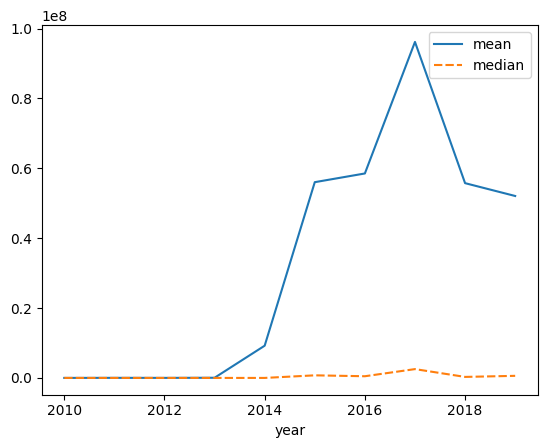

In [80]:
sns.lineplot(data=data.groupby('year')['box_office'].agg(['mean', 'median']))

**Задание 06.** Постройте сводную таблицу с подсчетом количества фильмов, выходивших в прокат в кинотеатрах каждый год. Решить задачу методами groupby(), agg() и pivot_table().

In [81]:
cinema_film_year_pivot = data.pivot_table(
    index='year',
    values='pu_number',
    aggfunc='count',
    margins=True,
    margins_name='total'
)

cinema_film_year_pivot.columns = ['count_films']

cinema_film_year_pivot

,count_films
year,
2010,981
2011,620
2012,592
2013,629
2014,807
2015,705
2016,818
2017,505
2018,891


In [82]:
data_grouped_year = data.groupby('year').agg({'title':'count'})

data_grouped_year

,title
year,
2010,981
2011,620
2012,592
2013,629
2014,807
2015,705
2016,818
2017,505
2018,891


In [83]:
data.head(1)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,...,nonrefundable_support,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres,month,year
0,221048915,открытый простор,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",0,0,...,0,нет данных,7.2,"боевик,драма,мелодрама",«18+» - запрещено для детей,сша,кевин костнер,боевик,11,2015


**Задание 07.** Определите, **влияет ли возрастное ограничение аудитории** («6+», «12+», «16+», «18+» и т. д.) **на сборы фильма в прокате** в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением **собрали больше всего денег** в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [84]:
data_grouped_age_pivot = data.pivot_table(
    index = 'age_restriction',
    values ='box_office',
    aggfunc ='sum',
    margins=True,
    margins_name='total'
)

data_grouped_age_pivot.columns = ['box_office_sum']
data_grouped_age_pivot

,box_office_sum
age_restriction,
«0+» - для любой зрительской аудитории,1204959577
«12+» - для детей старше 12 лет,63225587957
«16+» - для детей старше 16 лет,76583673815
«18+» - запрещено для детей,42974727346
«6+» - для детей старше 6 лет,57530728753
total,241519677448


In [85]:
# посчитал сколько в процентах собрали фильмы, с определённым возрастным ограничением
data_grouped_age_pivot = data.groupby(['year', 'age_restriction']).agg({'box_office':'sum'})

data_grouped_age_pivot['box_office, %'] = (data_grouped_age_pivot['box_office'] / 241115660381 * 100)

data_grouped_age_pivot.tail(25)

box_office  box_office, %
year age_restriction                                                   
2015 «0+» - для любой зрительской аудитории    379054567       0.157209
     «12+» - для детей старше 12 лет         13616081989       5.647116
     «16+» - для детей старше 16 лет         11368120823       4.714800
     «18+» - запрещено для детей              5432308329       2.252989
     «6+» - для детей старше 6 лет            8701799354       3.608973
2016 «0+» - для любой зрительской аудитории    150228839       0.062306
     «12+» - для детей старше 12 лет         12204446503       5.061657
     «16+» - для детей старше 16 лет         16664548492       6.911433
     «18+» - запрещено для детей              6793929771       2.817706
     «6+» - для детей старше 6 лет           12053145991       4.998906
2017 «0+» - для любой зрительской аудитории    229598930       0.095224
     «12+» - для детей старше 12 лет          7851427659       3.256291
     «16+» - для детей старше 16 лет         18745042899       7.774295
     «18+» - запрещено для детей              9651495581       4.002849
     «6+» - для детей старше 6 лет           12086142145       5.012591
2018 «0+» - для любой зрительской аудитории     32449001       0.013458
     «12+» - для детей старше 12 лет         14267291636       5.917198
     «16+» - для детей старше 16 лет         16503602284       6.844683
     «18+» - запрещено для детей              8760085436       3.633147
     «6+» - для детей старше 6 лет           10104974592       4.190924
2019 «0+» - для любой зрительской аудитории     17746066       0.007360
     «12+» - для детей старше 12 лет         12680198743       5.258969
     «16+» - для детей старше 16 лет         12753418927       5.289337
     «18+» - запрещено для детей             10121796238       4.197901
     «6+» - для детей старше 6 лет           12852548618       5.330450

**ответ**


1) да, возрастное ограничение влияет на сборы фильмов в прокате в период с 2015 по 2019 год.

2) фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате.

3) Проценты сборов меняются в зависимости от года, но в малой степени.

4) Возможно это связано с выходами многобюджетных фильмов рассчитанных на определённую возрастную категорию.

# Практика 05-06. Категоризация данных по числовым диапазонам

**Задание 08.** Рассчитайте количество фильмов с рейтингами в диапазонах от 0 до 3 баллов включительно, от 3 до 5, от 5 до 7, выше 7.

In [86]:
data['ratings'].value_counts().sort_values()

1.2      1
1.0      1
1.8      1
1.3      1
9.2      1
      ... 
7.2    252
6.8    261
6.7    307
6.6    312
0.0    961
Name: ratings, Length: 85, dtype: int64

In [87]:
data['ratings'].value_counts().sort_index()

0.0    961
1.0      1
1.1      2
1.2      1
1.3      1
      ... 
9.2      1
9.4      3
9.7      3
9.8      2
9.9      4
Name: ratings, Length: 85, dtype: int64

**Категоризация** — объединение данных в категории.

In [88]:
def ratings_group(ratings):

    if ratings <= 3:
        return '0.0-3.0'
    if ratings <= 5:
        return '3.1-5.0'
    if ratings <= 7:
        return '5.1-7.0'
    return '7.1-10.0'

Протестируем работу функции для каждого правила. Проверим, в какую категорию попадёт тот или иной рейтинг.

In [89]:
print(ratings_group(7.1))

7.1-10.0


In [90]:
print(ratings_group(2.7))

0.0-3.0


In [91]:
print(ratings_group(5))

3.1-5.0


In [92]:
print(ratings_group(9.3))

7.1-10.0


Написанная функция работает корректно.<br>
Далее необходимо создать отдельный столбец с категориями рейтинга и в его ячейках записать значения, возвращаемые функцией.<br>
Для этого используется метод **apply()**: он берёт значения столбца датафрейма и применяет к ним функцию из своего аргумента.<br>
В решаемой задаче apply() следует вызвать для столбца 'ratings', так как в нём содержатся данные, которые функция примет на вход. Аргументом метода станет сама функция ratings_group.

In [93]:
data['ratings_group'] = data['ratings'].apply(ratings_group)

data.sample(5)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,...,financing_source,ratings,genres,age_restriction,main_country,main_director,main_genres,month,year,ratings_group
4937,111007311,фауст,2011-11-29 12:00:00,художественный,ооо пролайн фильм,россия,а.сокуров,а.сигле,0,0,...,нет данных,6.7,"фэнтези,драма,детектив",«16+» - для детей старше 16 лет,россия,а.сокуров,фэнтези,11,2011,5.1-7.0
5932,121012118,мир будущего,2018-06-14 12:00:00,художественный,"ай эм би ай груп, блэк спэрроу филмз, дарк рэб...",сша,"джеймс франко, брюс тьерри чунг","моника бакарди, джей дэвис, джеймс франко",0,6499311,...,нет данных,4.1,"фантастика,боевик,приключения",«18+» - запрещено для детей,сша,джеймс франко,фантастика,6,2018,3.1-5.0
3423,121034016,призрак дома бриар,2016-12-21 12:00:00,художественный,"лайтхауз пикчерз, сэффаэ фаэ",канада,шелдон уилсон,"джэми горинг, кевин лисон, роберт холми младший",0,3427616,...,нет данных,4.9,"ужасы,триллер",«16+» - для детей старше 16 лет,канада,шелдон уилсон,ужасы,12,2016,3.1-5.0
3687,114002616,мульт в кино. день рождения лунтика,2016-08-31 12:00:00,анимационный,ооо мульт в кино,россия,о.семёнова,п.смирнов,0,339794,...,нет данных,0.0,нет данных,«0+» - для любой зрительской аудитории,россия,о.семёнова,нет данных,8,2016,0.0-3.0
7076,111011719,конец сезона,2019-08-01 12:00:00,художественный,ооо киностудия вертикаль,россия,к.худяков,"с.говорухин, е.маскина",60150376,596072,...,министерство культуры,5.4,"триллер,мелодрама",«16+» - для детей старше 16 лет,россия,к.худяков,триллер,8,2019,5.1-7.0


In [94]:
data['ratings_group'].value_counts().sort_values()

3.1-5.0      562
0.0-3.0     1026
7.1-10.0    2114
5.1-7.0     3776
Name: ratings_group, dtype: int64

# Практика 05-06. Функция для одной строки

**Задание 09.** Условия предыдущей задачи изменились. В датафрейм необходимо добавить еще один столбец, в котором будет выводиться одно из двух значений: "популярный" - если у фильма оценки в диапазоне "7.1-10.0" и сборы свыше 5_000_000, для остальных фильмов будет выставляться прочерк. Необходимо посчитать количество популярных фильмов.

Теперь принимаются во внимание **значения двух столбцов**: 'ratings_group' и 'box_office'. Чтобы функция учитывала несколько столбцов датафрейма, **в качестве аргумента ей передают всю строку целиком**. Обозначим строку переменной row, а в коде функции обратимся к конкретным значениям столбцов row['ratings_group'] и row['box_office'].

In [95]:
def popular_cinema_movies(row):

    ratings_group = row['ratings_group']
    box_office = row['box_office']

    if ratings_group == '7.1-10.0':
        if box_office >= 5_000_000:
            return 'popular'

        return '-'

    return '-'

В предыдущей задаче, тестируя работу функции, менялся рейтинг фильма в её аргументе. Сейчас на входе не только рейтинг, но и сборы, значит, для проверки нужно передавать целую строку датафрейма с этими значениями. Это делают в несколько шагов.

1. Создают два списка. В одном — значения, в другом — названия столбцов датафрейма.

In [96]:
row_values = ['7.1-10.0', 7894517]
row_columns = ['ratings_group', 'box_office']

2. Формируют строку.

In [97]:
row = pd.Series(data=row_values, index=row_columns)

3. Передают строку в качестве аргумента функции для тестирования.

In [98]:
popular_cinema_movies(row)

'popular'

Функция работает корректно.<br>
Теперь необходимо создать новый столбец 'popular' со значениями-результатами работы функции popular_cinema_movies().<br>
Как и в предыдущей задаче, вызовем метод apply(), однако с двумя важными отличиями:<br>
1) метод apply() применяют не к столбцу, а к датафрейму data.
2) по умолчанию Pandas передаёт в функцию столбец; чтобы на вход в функцию отправлялись строки, нужно указать параметр axis=1 метода apply().

In [99]:
data['popular'] = data.apply(popular_cinema_movies, axis=1)

data.sample(5)

,pu_number,title,show_start_date,type,film_studio,production_country,director,producer,budget,box_office,...,ratings,genres,age_restriction,main_country,main_director,main_genres,month,year,ratings_group,popular
5884,111006218,байгал,2018-05-29 12:00:00,художественный,роооо ск рт,россия,и.ягафаров,и.ягафаров,0,0,...,0.0,нет данных,«12+» - для детей старше 12 лет,россия,и.ягафаров,нет данных,5,2018,0.0-3.0,-
5016,111006811,огни притона,2011-10-20 12:00:00,художественный,ооо ин моушн,россия,а.гордон,е.яцура,0,0,...,6.7,драма,«16+» - для детей старше 16 лет,россия,а.гордон,драма,10,2011,5.1-7.0,-
5921,112000518,"""державная"" размышления 100 лет спустя",2018-06-07 12:00:00,документальный,ао амальгама студия,россия,д.алейников,"с.новиков, а.феофанов",0,0,...,0.0,нет данных,«12+» - для детей старше 12 лет,россия,д.алейников,нет данных,6,2018,0.0-3.0,-
5776,111002318,"все в дыму, любовь в крыму",2018-03-21 12:00:00,художественный,ооо крым кино,россия,в.павлов,"в.михайлов, в.павлов, м.пореченков",0,0,...,0.0,нет данных,«12+» - для детей старше 12 лет,россия,в.павлов,нет данных,3,2018,0.0-3.0,-
5787,121005918,6 дней,2018-04-03 12:00:00,художественный,дженерал фильм корпорейшн,"великобритания, новая зеландия",тоа фрейзер,мэтью мэткалф,0,0,...,6.0,"боевик,триллер,драма",«18+» - запрещено для детей,великобритания,тоа фрейзер,боевик,4,2018,5.1-7.0,-


In [100]:
data['popular'].value_counts().sort_values()

popular     277
-          7201
Name: popular, dtype: int64